| Changes | Time | Difficulty | 
|---------|------|------------|
|Use elbow method to find the best number of cluster and get 3 for dataset to find if the customer has risk_flag or not|40 mins|4|
|Train the model with only 4 features using cluster of 3 and the cluster are overlapping each other too much|20 mins|2|
|Retrain the model using 10 features and get a lower silhoutte score of 0.15 compare to previous of 0.18|30 mins|3|
|Encode categorical faetures and use all 13 features to train the model , but does not work|1 hour|6|
|Lower iteration value to run faster and no changes to cluster|10mins|1|
|Change algorithm to use Elkan since the dataset is big but the result stay similar|10 mins|1|
|Change dataset about cancer cell but does not work since dataset only contain yes and no|1 hour|6|
|Train the model using wine data with default settings but use elbow method to get the cluster number which is 4|45 mins|5|


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [2]:
import os
os.environ["OMP_NUM_THREADS"] = "7"

In [3]:
file_path = 'wine_data.csv'
df = pd.read_csv(file_path)

In [4]:
scaler = StandardScaler()
X = df.iloc[:, :-1]
X_train_scaled = scaler.fit_transform(X)

C:\Users\GGMachines_Gaming\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\GGMachines_Gaming\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\GGMachines_Gaming\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\GGMachines_Gaming\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

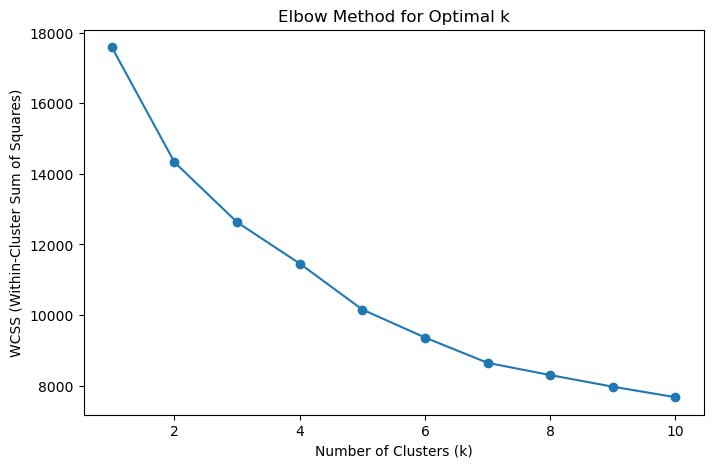

In [5]:
wcss = []  

for k in range(1, 11) :
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [6]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)  
kmeans.fit(X_train_scaled)

clusters = kmeans.labels_

silhouette = silhouette_score(X_train_scaled, clusters)
print(f'Silhouette Score: {silhouette:.4f}')

C:\Users\GGMachines_Gaming\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Silhouette Score: 0.1716


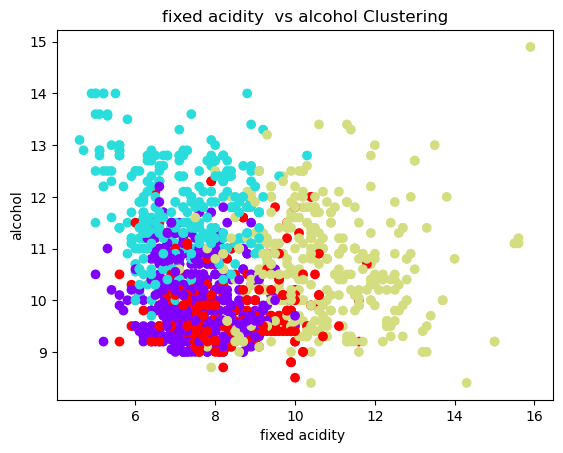

In [22]:
plt.scatter(df['fixed acidity'], df['alcohol'], c=clusters, cmap='rainbow')

plt.title('fixed acidity  vs alcohol Clustering')
plt.xlabel('fixed acidity ')
plt.ylabel('alcohol')

plt.show()

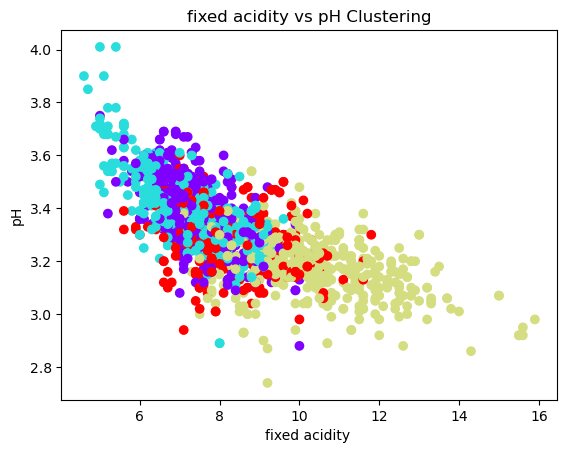

In [30]:
plt.scatter(df['fixed acidity'], df['pH'], c=clusters, cmap='rainbow')

plt.title('fixed acidity vs pH Clustering')
plt.xlabel('fixed acidity ')
plt.ylabel('pH')

plt.show()

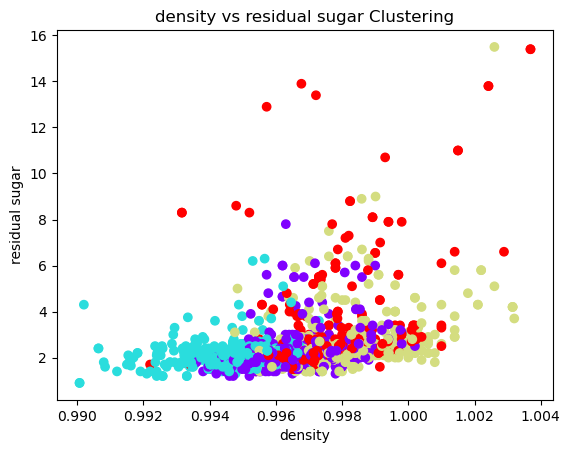

In [32]:
plt.scatter(df['density'], df['residual sugar'], c=clusters, cmap='rainbow')

plt.title('density vs residual sugar Clustering')
plt.xlabel('density')
plt.ylabel('residual sugar')

plt.show()